# Explorer les données

Par example, il serait intéressant de visualiser la moyenne du rayonnement diffu pour toutes les journées de l'année

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = '../Penn_State_PA_2012.gzip'
df = pd.read_csv(filename, encoding='utf-8', compression='gzip', index_col='timestamp', parse_dates=True)
df.index = df.index.tz_localize('UTC').tz_convert('US/Eastern')

In [3]:
col_flag = df.columns[df.columns.str.endswith('_Flag')]
col_noflag = col_flag.str.replace('_Flag', '')
for i in col_noflag.values:
    df.loc[df[i + '_Flag'] > 0, i] = np.nan

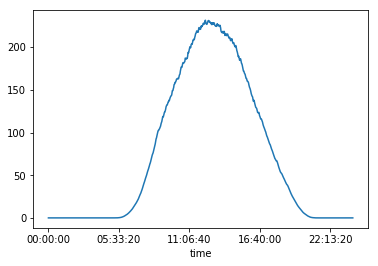

In [4]:
df.groupby(df.index.time).diffuse.mean().plot()